In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load data, coye data, and replace missing values.

In [3]:
train_and_test = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
predict = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [4]:
train_and_test_original = train_and_test.copy()
predict_original = predict.copy()

In [5]:
train_and_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
predict.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
train_and_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train_and_test.index = train_and_test.index + 1

In [9]:
predict.index = predict.index + 1

In [10]:
train_and_test.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#impute missing values with mode for category variable
#replace missing values with median for numeruc variable
train_and_test['Gender'].fillna(train_and_test['Gender'].mode()[0],inplace=True)
train_and_test['Married'].fillna(train_and_test['Married'].mode()[0], inplace=True)
train_and_test['Dependents'].fillna(train_and_test['Dependents'].mode()[0], inplace=True)
train_and_test['Self_Employed'].fillna(train_and_test['Self_Employed'].mode()[0], inplace=True)
train_and_test['LoanAmount'].fillna(train_and_test['LoanAmount'].median(), inplace=True)
train_and_test['Loan_Amount_Term'].fillna(train_and_test['Loan_Amount_Term'].mode()[0], inplace=True)
train_and_test['Credit_History'].fillna(train_and_test['Credit_History'].mode()[0], inplace=True)


In [12]:
train_and_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
predict.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [14]:
#impute missing values with mode for category variable
#replace missing values with median for numeruc variable
predict['Gender'].fillna(predict['Gender'].mode()[0],inplace=True)
predict['Dependents'].fillna(predict['Dependents'].mode()[0], inplace=True)
predict['Self_Employed'].fillna(predict['Self_Employed'].mode()[0], inplace=True)
predict['LoanAmount'].fillna(predict['LoanAmount'].median(), inplace=True)
predict['Loan_Amount_Term'].fillna(predict['Loan_Amount_Term'].mode()[0], inplace=True)
predict['Credit_History'].fillna(predict['Credit_History'].mode()[0], inplace=True)

In [15]:
predict.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [16]:
train_and_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 1 to 614
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 1 to 367
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [18]:
#Exploratory Data Analysis

In [19]:
train_and_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
2,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
train_and_test['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

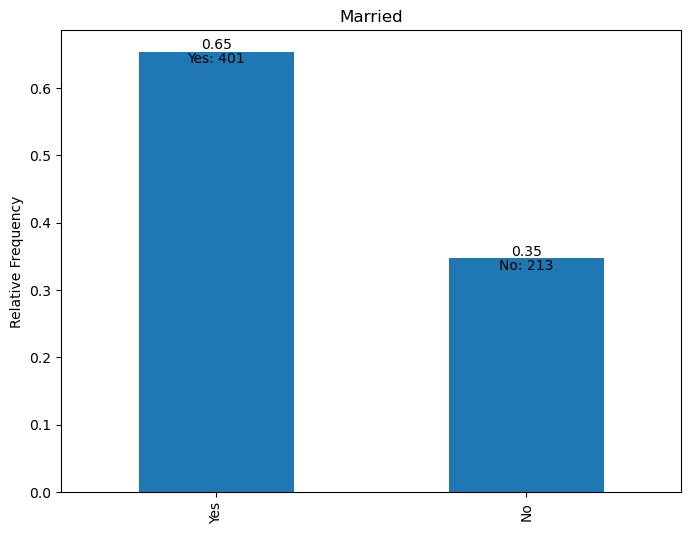

In [21]:
relative_frequencies = train_and_test['Married'].value_counts(normalize=True)
value_counts = train_and_test['Married'].value_counts()
ax = relative_frequencies.plot(kind='bar', figsize=(8, 6))
for index, value in enumerate(relative_frequencies):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    ax.text(index, value, f'{relative_frequencies.index[index]}: {value_counts[relative_frequencies.index[index]]}', ha='center', va='top', fontsize=10)
plt.ylabel('Relative Frequency')
plt.title('Married')
plt.show()

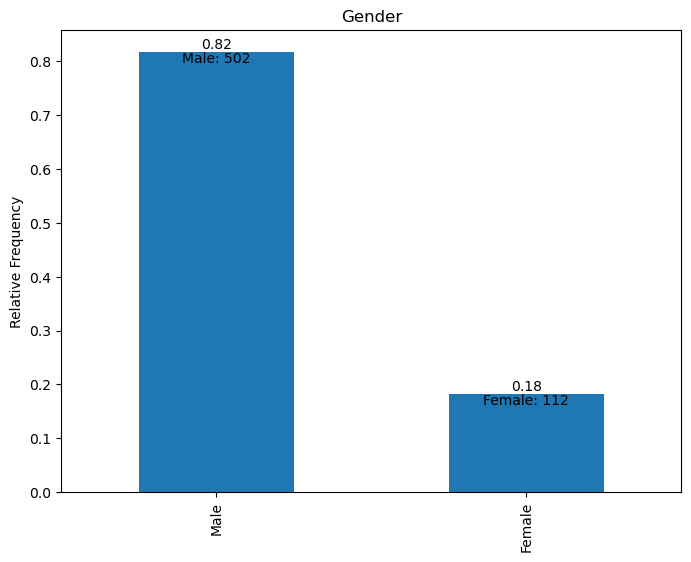

In [22]:
relative_frequencies = train_and_test['Gender'].value_counts(normalize=True)
value_counts = train_and_test['Gender'].value_counts()
ax = relative_frequencies.plot(kind='bar', figsize=(8, 6))
for index, value in enumerate(relative_frequencies):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    ax.text(index, value, f'{relative_frequencies.index[index]}: {value_counts[relative_frequencies.index[index]]}', ha='center', va='top', fontsize=10)
plt.ylabel('Relative Frequency')
plt.title('Gender')
plt.show()

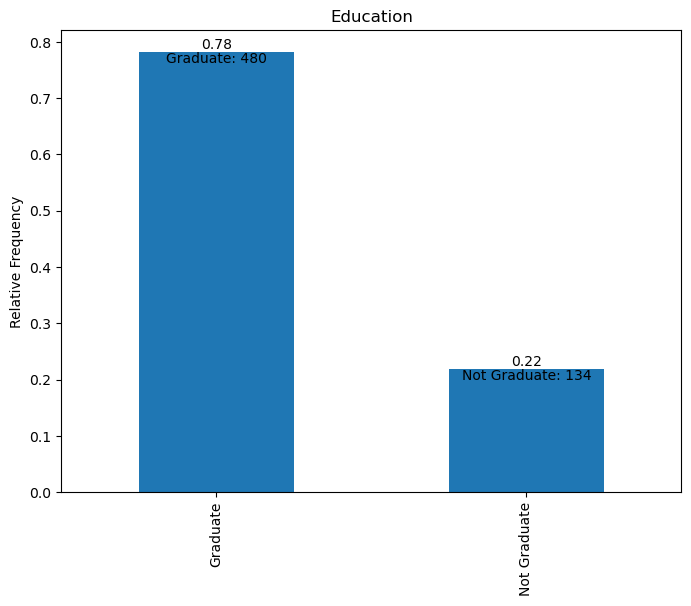

In [23]:
relative_frequencies = train_and_test['Education'].value_counts(normalize=True)
value_counts = train_and_test['Education'].value_counts()
ax = relative_frequencies.plot(kind='bar', figsize=(8, 6))
for index, value in enumerate(relative_frequencies):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    ax.text(index, value, f'{relative_frequencies.index[index]}: {value_counts[relative_frequencies.index[index]]}', ha='center', va='top', fontsize=10)
plt.ylabel('Relative Frequency')
plt.title('Education')
plt.show()

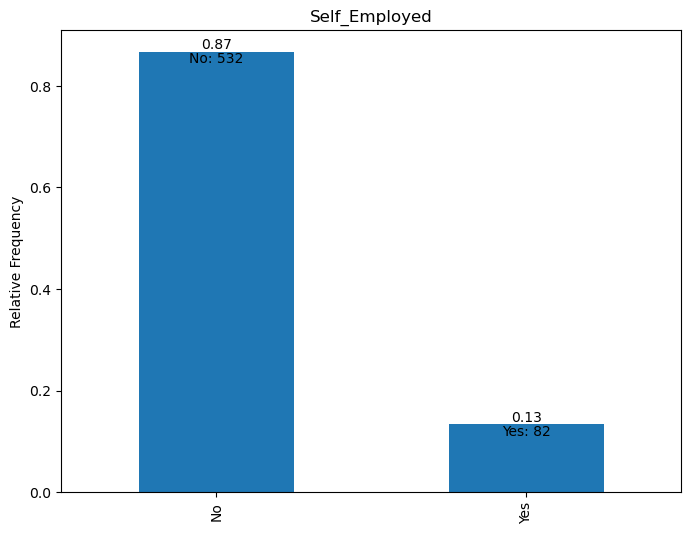

In [24]:
relative_frequencies = train_and_test['Self_Employed'].value_counts(normalize=True)
value_counts = train_and_test['Self_Employed'].value_counts()
ax = relative_frequencies.plot(kind='bar', figsize=(8, 6))
for index, value in enumerate(relative_frequencies):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    ax.text(index, value, f'{relative_frequencies.index[index]}: {value_counts[relative_frequencies.index[index]]}', ha='center', va='top', fontsize=10)
plt.ylabel('Relative Frequency')
plt.title('Self_Employed')
plt.show()

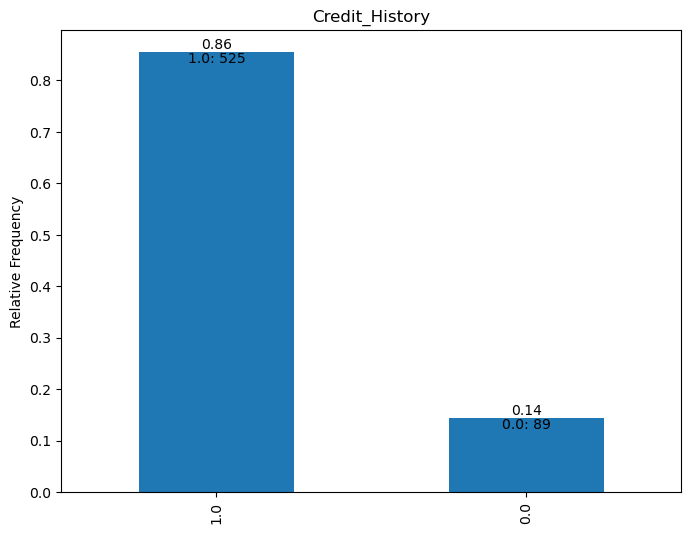

In [25]:
relative_frequencies = train_and_test['Credit_History'].value_counts(normalize=True)
value_counts = train_and_test['Credit_History'].value_counts()
ax = relative_frequencies.plot(kind='bar', figsize=(8, 6))
for index, value in enumerate(relative_frequencies):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    ax.text(index, value, f'{relative_frequencies.index[index]}: {value_counts[relative_frequencies.index[index]]}', ha='center', va='top', fontsize=10)
plt.ylabel('Relative Frequency')
plt.title('Credit_History')
plt.show()

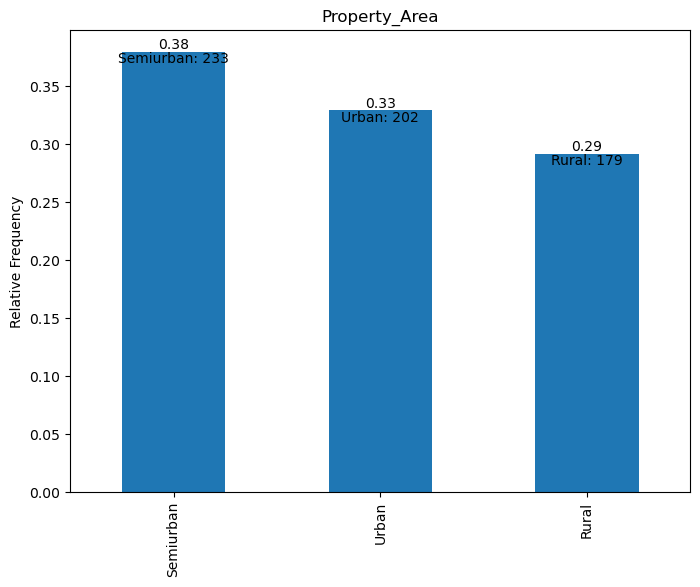

In [26]:
relative_frequencies = train_and_test['Property_Area'].value_counts(normalize=True)
value_counts = train_and_test['Property_Area'].value_counts()
ax = relative_frequencies.plot(kind='bar', figsize=(8, 6))
for index, value in enumerate(relative_frequencies):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    ax.text(index, value, f'{relative_frequencies.index[index]}: {value_counts[relative_frequencies.index[index]]}', ha='center', va='top', fontsize=10)
plt.ylabel('Relative Frequency')
plt.title('Property_Area')
plt.show()

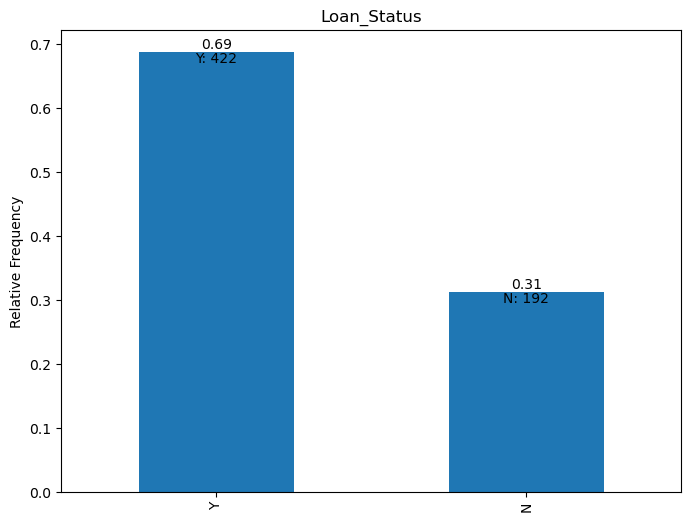

In [27]:
relative_frequencies = train_and_test['Loan_Status'].value_counts(normalize=True)
value_counts = train_and_test['Loan_Status'].value_counts()
ax = relative_frequencies.plot(kind='bar', figsize=(8, 6))
for index, value in enumerate(relative_frequencies):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    ax.text(index, value, f'{relative_frequencies.index[index]}: {value_counts[relative_frequencies.index[index]]}', ha='center', va='top', fontsize=10)
plt.ylabel('Relative Frequency')
plt.title('Loan_Status')
plt.show()

<Axes: xlabel='LoanAmount', ylabel='Count'>

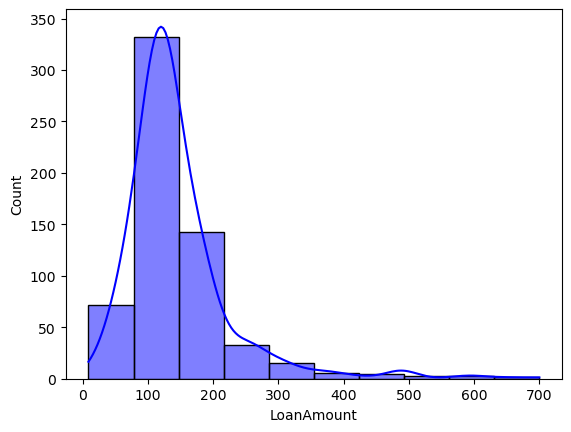

In [28]:
sns.histplot(train_and_test['LoanAmount'], kde=True, color='blue', bins=10) 

<Axes: xlabel='Married', ylabel='LoanAmount'>

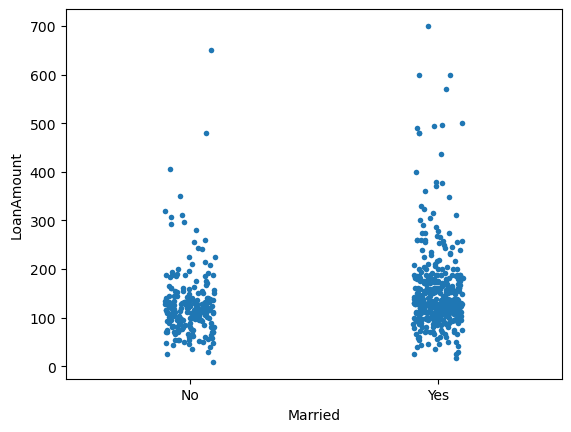

In [29]:
sns.stripplot(x='Married', y='LoanAmount', hue=None, data=train_and_test, jitter=True, color=None,
             size=4,ax=None)

<Axes: xlabel='Married', ylabel='LoanAmount'>

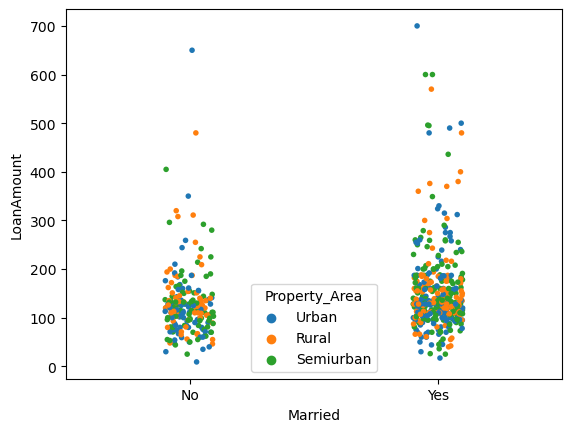

In [30]:
sns.stripplot(x='Married',y='LoanAmount', hue='Property_Area',data=train_and_test, jitter=True,size=4)

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

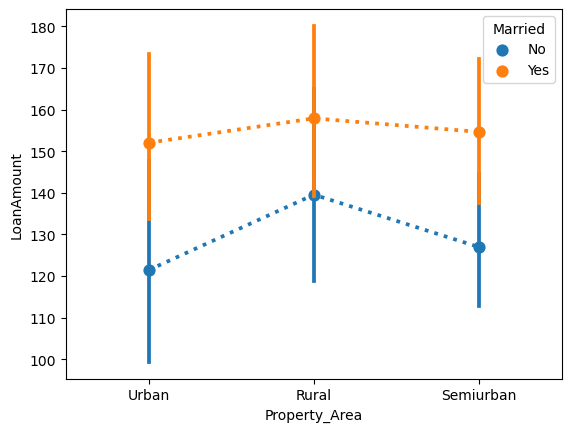

In [31]:
sns.pointplot(x='Property_Area',y='LoanAmount', hue='Married',data=train_and_test,estimator=np.mean,errorbar=('ci', 99),
                 n_boot=1000,  markers="o",linestyles=':')

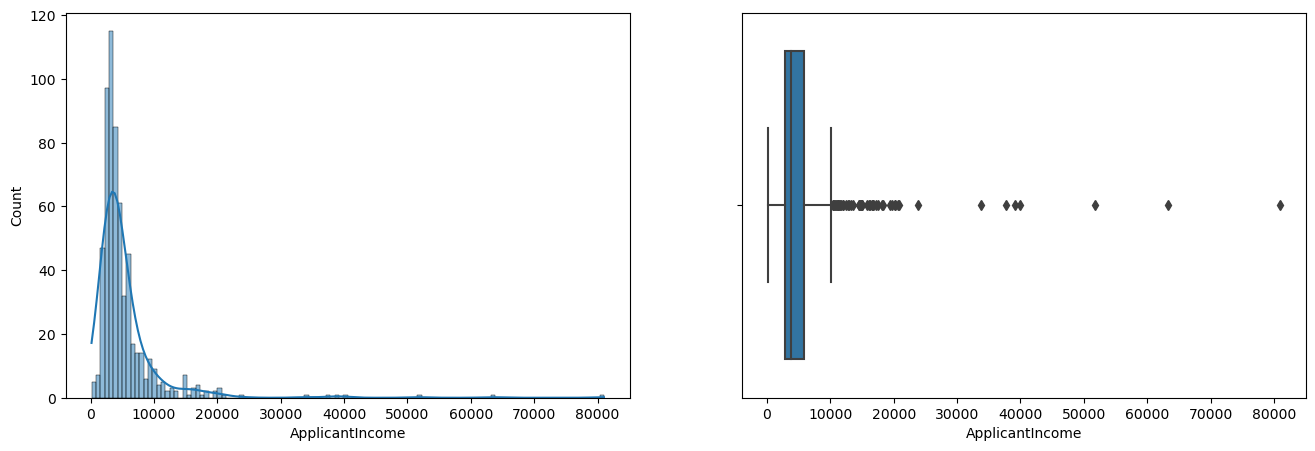

In [32]:


# Create a figure with two subplots (1 row, 2 columns)
plt.figure(1, figsize=(16, 5))

# First subplot: histogram using displot from Seaborn
plt.subplot(121)
sns.histplot(train_and_test['ApplicantIncome'],kde=True)

# Second subplot: box plot using boxplot from Seaborn
plt.subplot(122)
sns.boxplot(x=train_and_test['ApplicantIncome'])

# Show the plots
plt.show()


In [33]:
#Loan status with other features

In [34]:
Married = pd.crosstab(train_and_test['Married'],train_and_test['Loan_Status'])
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


In [35]:
Married.div(Married.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.281796,0.718204


<Axes: xlabel='Married'>

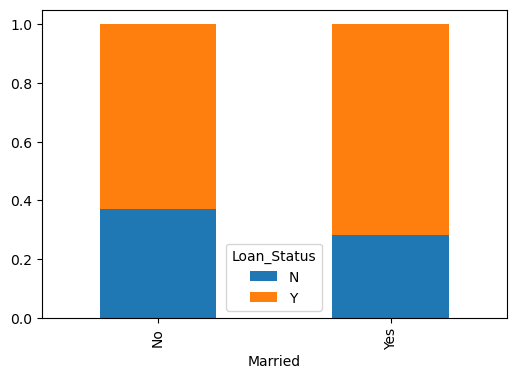

In [36]:
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(6,4))

In [37]:
Credit_History = pd.crosstab(train_and_test['Credit_History'],train_and_test['Loan_Status'])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


In [38]:
Credit_History.div(Credit_History.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.209524,0.790476


<Axes: xlabel='Credit_History'>

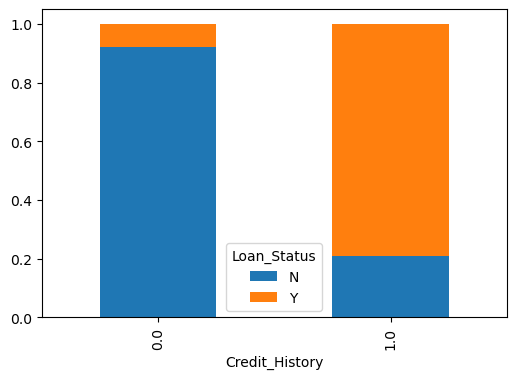

In [39]:

Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,4))

In [40]:
Property_Area=pd.crosstab(train_and_test['Property_Area'],train_and_test['Loan_Status'])
Property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [41]:
Property_Area.div(Property_Area.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416


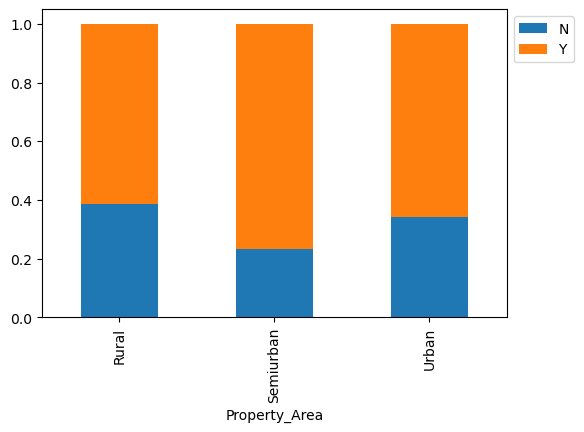

In [42]:
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,4))
plt.legend(bbox_to_anchor=(1,1),loc='best')

In [43]:
# Adding a feature: Total income
train_and_test['Total_Income']=train_and_test['ApplicantIncome']+train_and_test['CoapplicantIncome']

In [44]:
bins=[0,2500,4000,6000,81000]
group =['Low','Average','High','Very High']
train_and_test['Total_Income_bin'] = pd.cut(train_and_test['Total_Income'],bins,labels=group)
train_and_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
1,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,High
2,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Very High
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High
5,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average
611,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,High
612,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,Very High
613,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,Very High


In [45]:
Total_Income_bin = pd.crosstab(train_and_test['Total_Income_bin'],train_and_test['Loan_Status'])
Total_Income_bin

Loan_Status,N,Y
Total_Income_bin,,
Low,14,10
Average,32,87
High,65,159
Very High,81,166


In [46]:
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Total_Income_bin,,
Low,0.583333,0.416667
Average,0.268908,0.731092
High,0.290179,0.709821
Very High,0.327935,0.672065


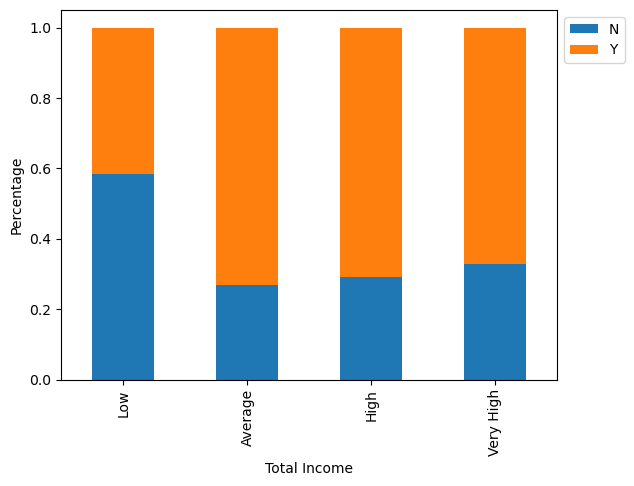

In [47]:
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1,1),loc='best')

Proportions of loan getting approvals with low total income applicants is very low compared with the proportions of loan getting approvals with average/high/very high total income applicants.


In [48]:
train_and_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
1,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,High
2,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Very High
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High
5,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High


In [49]:
train_and_test = train_and_test.drop(['Total_Income_bin','Loan_ID'],axis = 1)
train_and_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
2,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
3,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
4,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
5,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
611,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
612,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
613,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [50]:
train_and_test['Dependents'].replace('3+', 3, inplace=True)
predict['Dependents'].replace('3+', 3, inplace=True)
train_and_test['Loan_Status'].replace('N', 0, inplace=True)
train_and_test['Loan_Status'].replace('Y', 1, inplace=True)

In [51]:
train_and_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0
2,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
3,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
4,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
5,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [52]:
trainandtest_numeric_columns = train_and_test[train_and_test.select_dtypes(include=['number']).columns]
trainandtest_numeric_columns = trainandtest_numeric_columns.drop('Total_Income',axis=1)


<Axes: >

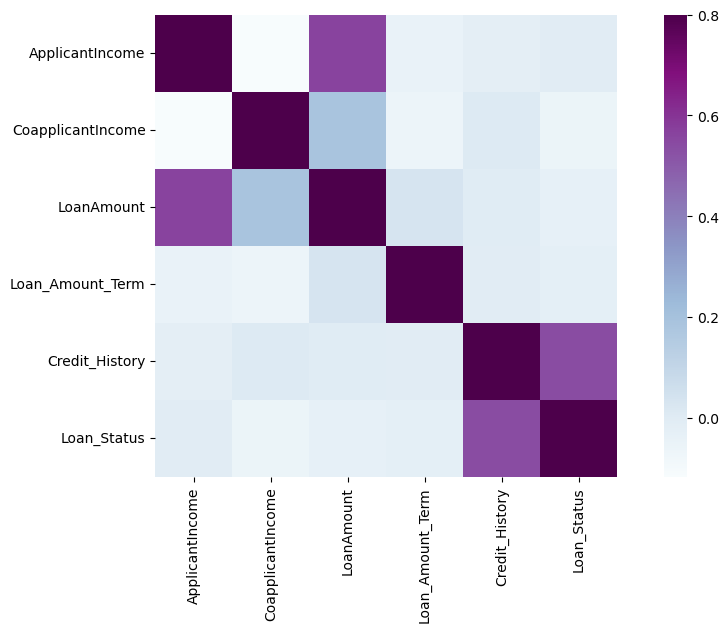

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(trainandtest_numeric_columns.corr(),vmax = 0.8, square=True, cmap='BuPu')

In [54]:
train_and_test = train_and_test.drop(['Total_Income'],axis = 1)

In [55]:
train_and_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [56]:
predict.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [57]:
#Model Building
x = train_and_test.drop('Loan_Status',axis=1)
y = train_and_test['Loan_Status']

In [92]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,5849,0.0,128.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
2,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
3,3000,0.0,66.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
4,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
5,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,2900,0.0,71.0,360.0,1.0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
611,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
612,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
613,7583,0.0,187.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1


In [58]:
x = pd.get_dummies(x)
train_and_test = pd.get_dummies(train_and_test)
predict = predict.drop(['Loan_ID'], axis=1)
predict = pd.get_dummies(predict)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
model = DecisionTreeClassifier(random_state=1)

In [63]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [64]:
predictions = model.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score, classification_report

In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.48      0.55      0.52        56
           1       0.79      0.74      0.77       129

    accuracy                           0.69       185
   macro avg       0.64      0.65      0.64       185
weighted avg       0.70      0.69      0.69       185



In [67]:
print(accuracy_score(y_test, predictions))

0.6864864864864865


In [68]:
#RandomForest Model 
from sklearn.ensemble import RandomForestClassifier

In [69]:
classifier_rf = RandomForestClassifier(random_state=42,n_jobs=-1, max_depth=5,n_estimators=100,oob_score=True)

In [70]:
classifier_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [71]:
predictions = classifier_rf.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score, classification_report

In [73]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.46      0.61        56
           1       0.81      0.98      0.88       129

    accuracy                           0.82       185
   macro avg       0.85      0.72      0.75       185
weighted avg       0.83      0.82      0.80       185



In [74]:
#RandomForest with hyperparameter tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [93]:
params = {'max_depth':[1,2,3,5,10,15],
         'min_samples_leaf':[1,2,4,10,20,40],
         'n_estimators':[5,10,20,100]}

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
grid_search = GridSearchCV(estimator=rf,
                          param_grid=params,
                          cv=4,
                          n_jobs=-1, verbose=1, scoring='accuracy')

In [96]:
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4, 10, 20, 40],
                         'n_estimators': [5, 10, 20, 100]},
             scoring='accuracy', verbose=1)

In [97]:
grid_search.best_score_

0.8042575285565939

In [98]:
rf_best = grid_search.best_estimator_

In [81]:
rf_best

RandomForestClassifier(max_depth=3, n_estimators=20, n_jobs=-1, random_state=42)

[Text(0.4583333333333333, 0.875, 'Credit_History <= 0.5\ngini = 0.46\nsamples = 259\nvalue = [154, 275]\nclass = No'),
 Text(0.25, 0.625, 'CoapplicantIncome <= 8115.0\ngini = 0.121\nsamples = 41\nvalue = [72, 5]\nclass = Disease'),
 Text(0.16666666666666666, 0.375, 'Married_Yes <= 0.5\ngini = 0.1\nsamples = 40\nvalue = [72, 4]\nclass = Disease'),
 Text(0.08333333333333333, 0.125, 'gini = 0.175\nsamples = 16\nvalue = [28, 3]\nclass = Disease'),
 Text(0.25, 0.125, 'gini = 0.043\nsamples = 24\nvalue = [44, 1]\nclass = Disease'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = No'),
 Text(0.6666666666666666, 0.625, 'CoapplicantIncome <= 1718.0\ngini = 0.357\nsamples = 218\nvalue = [82, 270]\nclass = No'),
 Text(0.5, 0.375, 'Married_No <= 0.5\ngini = 0.405\nsamples = 128\nvalue = [57, 145]\nclass = No'),
 Text(0.4166666666666667, 0.125, 'gini = 0.335\nsamples = 74\nvalue = [24, 89]\nclass = No'),
 Text(0.5833333333333334, 0.125, 'gini = 0.467\nsamples = 54

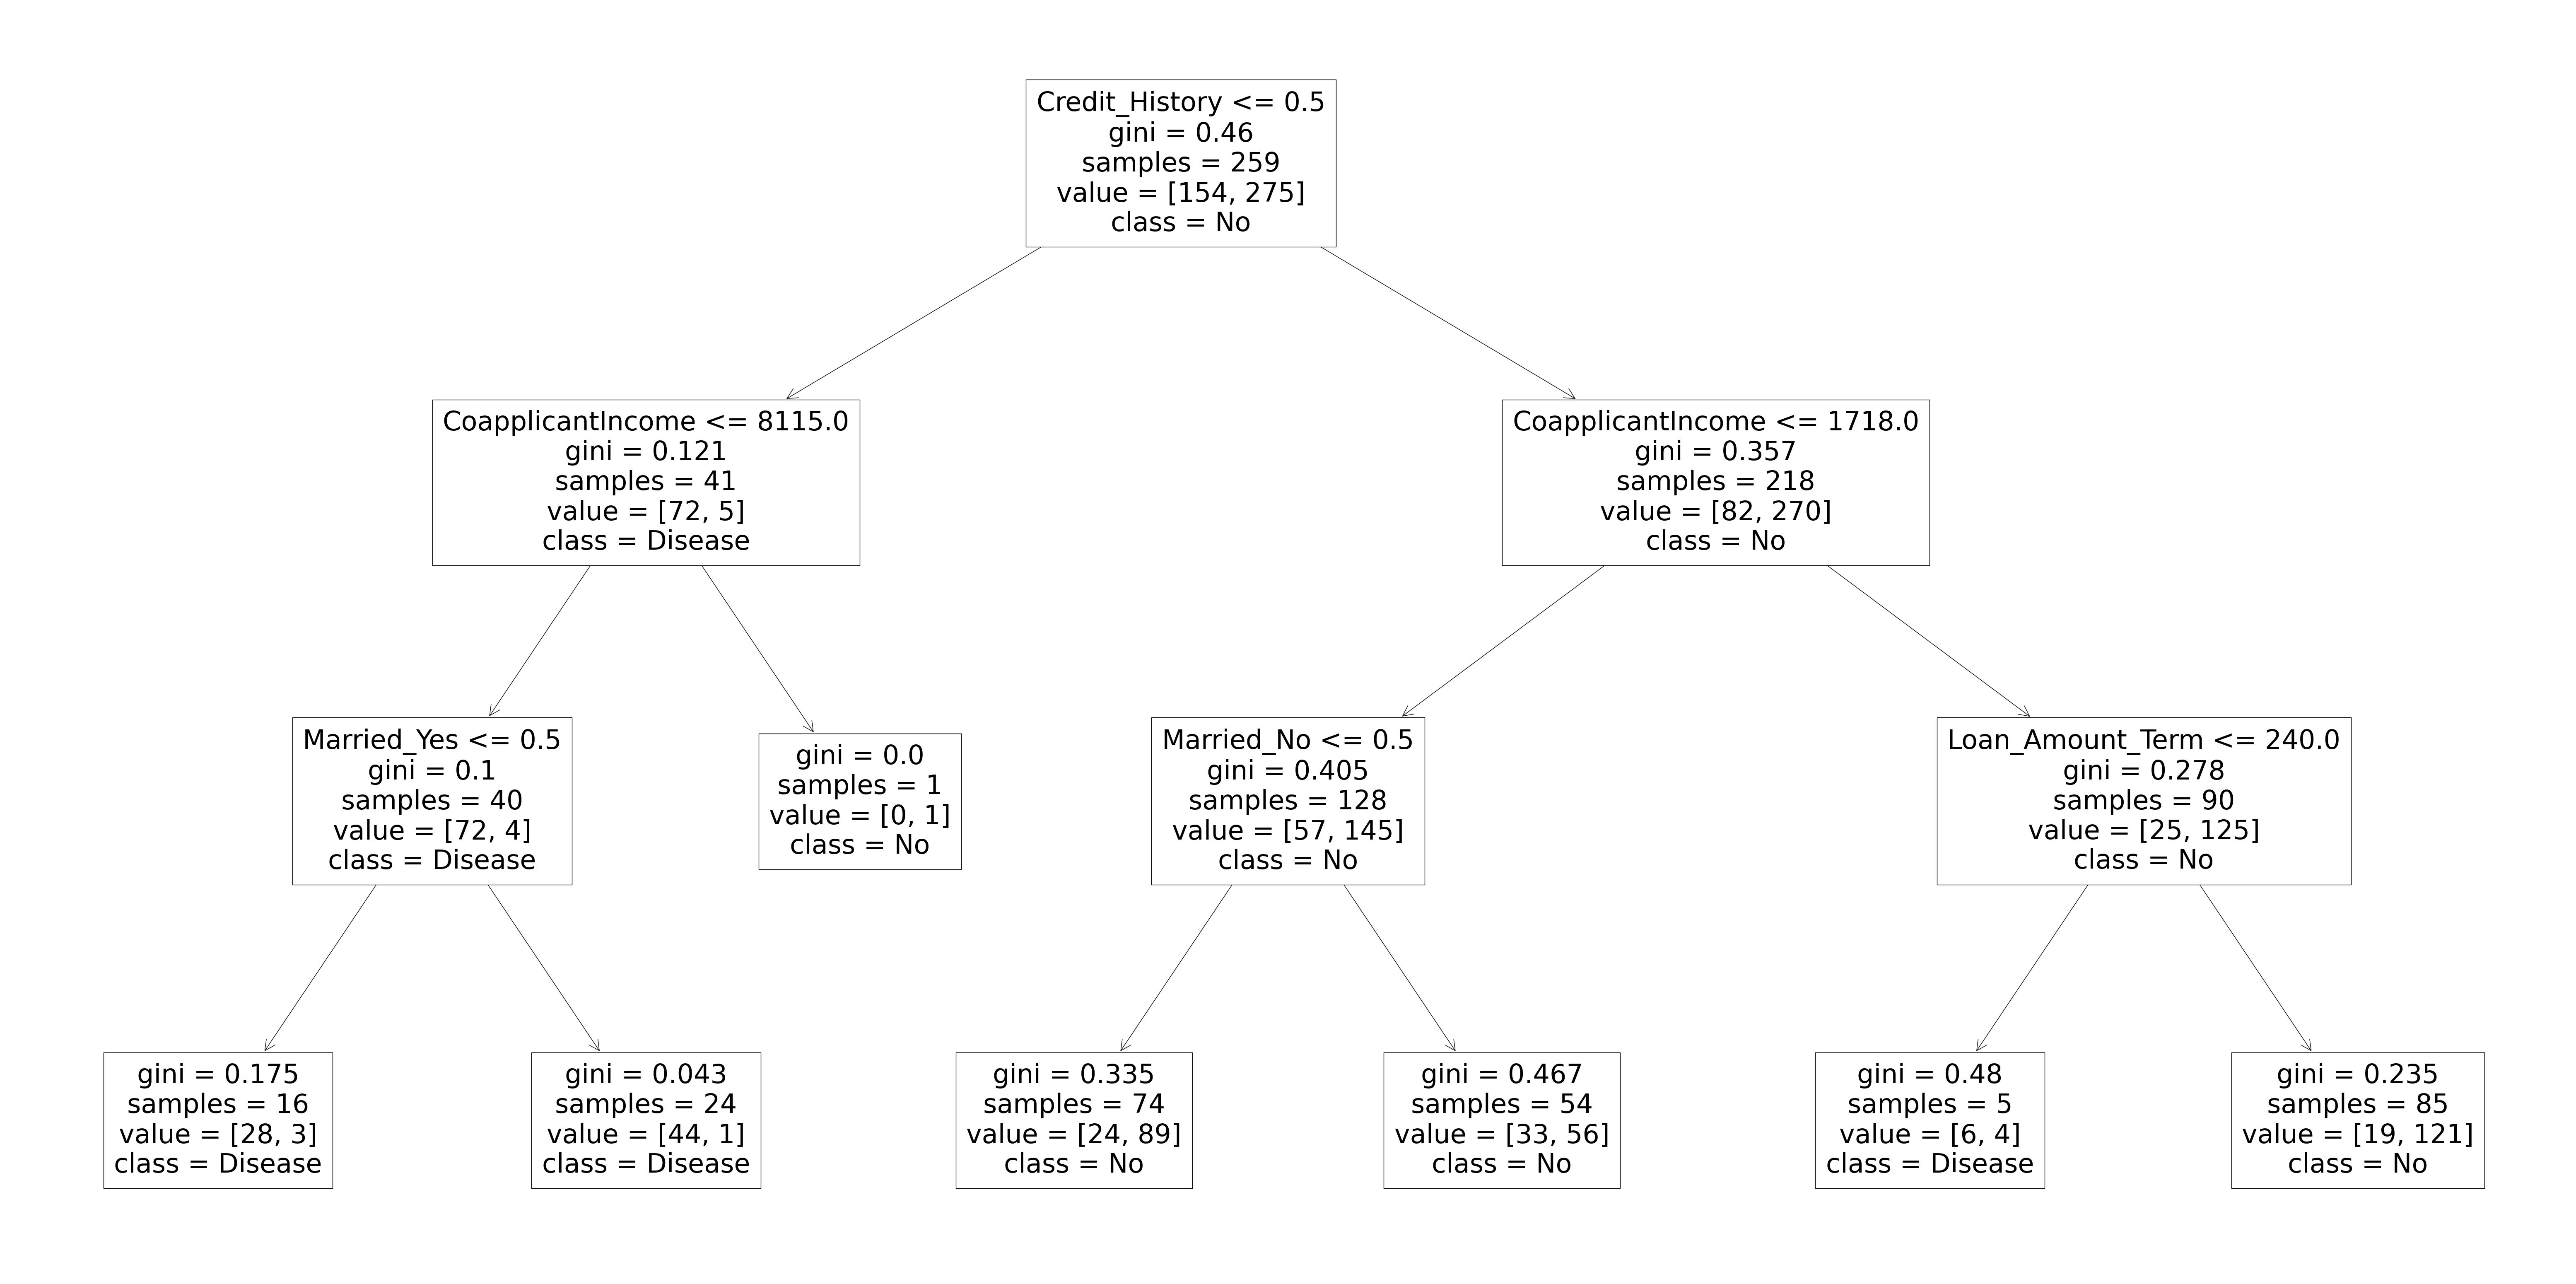

In [82]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[9], feature_names = x.columns, class_names=['Disease',"No"])

In [83]:
rf_best.feature_importances_

array([0.14373093, 0.06392827, 0.04008393, 0.06468437, 0.41590241,
       0.00525896, 0.01959502, 0.00753467, 0.03663081, 0.00288003,
       0.00533583, 0.04693308, 0.02352572, 0.05412681, 0.01139163,
       0.00256771, 0.        , 0.02665381, 0.02360677, 0.00562926])

In [84]:
imp_df = pd.DataFrame({
    "Varname":x_train.columns,
    "Imp":rf_best.feature_importances_
})

In [85]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
4,Credit_History,0.415902
0,ApplicantIncome,0.143731
3,Loan_Amount_Term,0.064684
1,CoapplicantIncome,0.063928
13,Education_Graduate,0.054127
11,Dependents_1,0.046933
2,LoanAmount,0.040084
8,Married_Yes,0.036631
17,Property_Area_Rural,0.026654
18,Property_Area_Semiurban,0.023607


In [86]:
predicted= grid_search.predict(predict)
predicted

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [87]:
predict['predict loan_status'] = predicted

In [88]:
predict.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,...,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,predict loan_status
1,5720,0,110.0,360.0,1.0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,1
2,3076,1500,126.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,1
3,5000,1800,208.0,360.0,1.0,0,1,0,1,0,...,0,1,1,0,1,0,0,0,1,1
4,2340,2546,100.0,360.0,1.0,0,1,0,1,0,...,0,1,1,0,1,0,0,0,1,1
5,3276,0,78.0,360.0,1.0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,1


In [89]:
#use logistic regression method
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)

y_pred = logreg_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7783783783783784
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.45      0.55        56
           1       0.79      0.92      0.85       129

    accuracy                           0.78       185
   macro avg       0.75      0.68      0.70       185
weighted avg       0.77      0.78      0.76       185



/Users/hongjin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
#xgboost method

In [91]:
# Step 1: Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

# Step 5: Make predictions using the trained model
y_pred = xgb_model.predict(x_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# You can also print the classification report and confusion matrix for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.745945945945946
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.48      0.53        56
           1       0.79      0.86      0.83       129

    accuracy                           0.75       185
   macro avg       0.70      0.67      0.68       185
weighted avg       0.73      0.75      0.74       185

Confusion Matrix:
[[ 27  29]
 [ 18 111]]
